In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.markers import MarkerStyle
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pathlib import Path
import seaborn as sns
import statsmodels.api as sm

# File to Load (Remember to Change These)
sales_csv = Path("Resources/vgsales.csv")

# Read School and Student Data File and store into Pandas DataFrames
sales_data = pd.read_csv(sales_csv)



In [2]:
sales_data = sales_data.drop(columns="Rank")

In [3]:
#Establish console maker
sales_data['Platform Company'] = sales_data['Platform']

In [4]:
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["N64","GC","Wii","WiiU","NES","GB","DS","SNES","GBA","3DS"],"Nintendo")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["PS","PS2","PS3","PSV","PSP","PS4"],"Sony")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["XOne","XB","X360"],"Microsoft")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["GG","SAT","Sega","GEN","SCD","DC"],"Sega")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["2600"],"Atari")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["WS"],"BANDAI")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["NG"],"SNK")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["TG16","PCFX"],"NEC")
sales_data["Platform Company"].unique()

array(['Nintendo', 'Microsoft', 'Sony', 'PC', 'Atari', 'Sega', 'BANDAI',
       'SNK', 'NEC', '3DO'], dtype=object)

In [5]:
sales_data["Genre"] = sales_data["Genre"].replace(["Sports","Racing"],"Sports & Racing")
sales_data["Genre"] = sales_data["Genre"].replace(["Puzzle","Strategy"],"Puzzle & Strategy")
sales_data["Genre"] = sales_data["Genre"].replace(["Platform"],"Adventure")

In [6]:
sales_data["Year"].isnull().sum()

271

In [7]:
#drop games with null year
sales_data_clean = sales_data.dropna(subset=["Year"]).copy()

In [8]:
sales_data_clean["Year"] = sales_data_clean["Year"].astype(int)

In [9]:
sales_data_clean.sort_values("NA_Sales")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
13655,Phantom Kingdom Portable,PSP,2011,Role-Playing,Nippon Ichi Software,0.00,0.00,0.04,0.00,0.04,Sony
13696,Banushi Life Game: Winner's Circle,DS,2007,Sports & Racing,Genki,0.00,0.00,0.04,0.00,0.04,Nintendo
13695,Breeding Stud 2,PS,1998,Sports & Racing,Konami Digital Entertainment,0.00,0.00,0.04,0.00,0.04,Sony
10004,Nobunaga no Yabou: Tenshoki,SAT,1995,Puzzle & Strategy,Tecmo Koei,0.00,0.00,0.11,0.00,0.11,Sega
10005,Stronghold,PC,2001,Puzzle & Strategy,Gathering of Developers,0.00,0.09,0.00,0.02,0.11,PC
...,...,...,...,...,...,...,...,...,...,...,...
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
5,Tetris,GB,1989,Puzzle & Strategy,Nintendo,23.20,2.26,4.22,0.58,30.26,Nintendo
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Nintendo
1,Super Mario Bros.,NES,1985,Adventure,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo


In [10]:
year_2016 = sales_data_clean[sales_data_clean["Year"] == 2016].index
sales_data_clean.drop(year_2016, inplace=True)

In [11]:
year_2017 = sales_data_clean[sales_data_clean["Year"] == 2017].index
sales_data_clean.drop(year_2017, inplace=True)

In [12]:
year_2020 = sales_data_clean[sales_data_clean["Year"] == 2020].index
sales_data_clean.drop(year_2020, inplace=True)

In [13]:
genre_name = []

for x in sales_data_clean["Genre"]:
    
    if x not in genre_name:
        genre_name.append(x)
genre_name.sort()
genre_name

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Puzzle & Strategy',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports & Racing']

In [14]:
#Correlations and regressions.

In [15]:
full_genre = LinearSegmentedColormap.from_list('custom_colors',["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"])

In [16]:
action = sales_data_clean[sales_data_clean["Genre"] == "Action"]
adv = sales_data_clean[sales_data_clean["Genre"] == "Adventure"]
fight = sales_data_clean[sales_data_clean["Genre"] == "Fighting"]
misc = sales_data_clean[sales_data_clean["Genre"] == "Misc"]
puzzle = sales_data_clean[sales_data_clean["Genre"] == "Puzzle & Strategy"]
rpg = sales_data_clean[sales_data_clean["Genre"] == "Role-Playing"]
shooter = sales_data_clean[sales_data_clean["Genre"] == "Shooter"]
sports = sales_data_clean[sales_data_clean["Genre"] == "Sports & Racing"]
simulation = sales_data_clean[sales_data_clean["Genre"] == "Simulation"]

In [17]:
pop_x = shooter.EU_Sales
pop_y = sports.EU_Sales
print(pop_x.mean())
print(pop_x.var())
print(len(pop_x))
print(pop_y.mean())
print(pop_y.var())
print(len(pop_y))

0.2422
0.3093768214571657
1250
0.17256912442396313
0.5231511044109045
3472


In [18]:
st.ttest_ind(pop_x.values, pop_y.values, equal_var=False)

Ttest_indResult(statistic=3.489497475688349, pvalue=0.0004912614990934529)

The correlation is 0.45.
Linear Regression Model: y = 0.17 x + 0.03


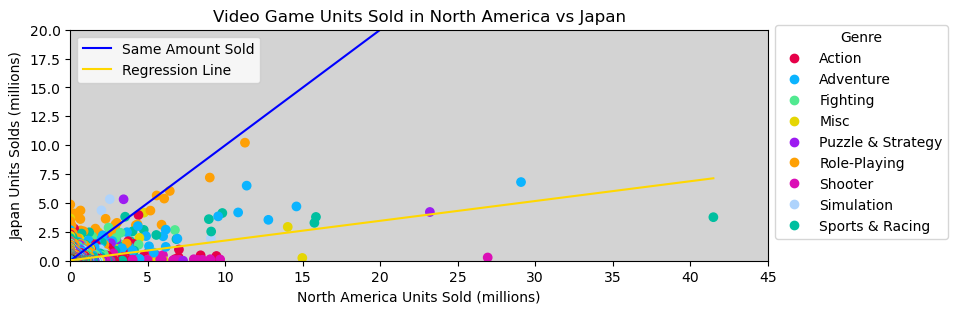

In [50]:
corr = round(st.pearsonr(sales_data_clean["NA_Sales"], sales_data_clean["JP_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs JP
x_values = sales_data_clean["NA_Sales"]
y_values = sales_data_clean["JP_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"
print(line_eq)
fig, ax = plt.subplots(figsize=(9, 3),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,45])
plt.ylim([0,20])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre", bbox_to_anchor=(1, 1.05))
ax.add_artist(leg1)

plt.title("Video Game Units Sold in North America vs Japan")
plt.xlabel("North America Units Sold (millions)")
plt.ylabel("Japan Units Solds (millions)")
plt.savefig("NAvsJP.png", transparent = True)
plt.show()

In [52]:
x1 = sales_data_clean["NA_Sales"]
y1 = sales_data_clean["JP_Sales"]
X = sm.add_constant(x1)
model = sm.OLS(y1, X).fit()
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:               JP_Sales   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     4094.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        21:12:59   Log-Likelihood:                -2368.1
No. Observations:               15979   AIC:                             4740.
Df Residuals:                   15977   BIC:                             4756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0333      0.002     14.273      0.0

In [55]:
print(f"R-squared:{model.rsquared:.3f}")

R-squared:0.204


The correlation is 0.63.


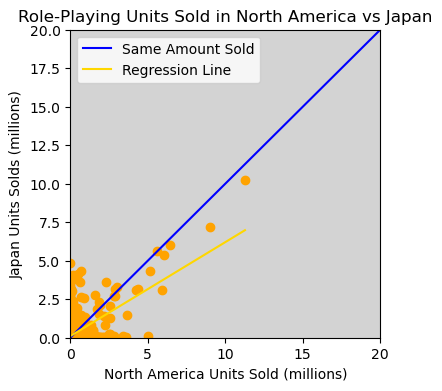

In [21]:
corr = round(st.pearsonr(rpg["NA_Sales"], rpg["JP_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = rpg["NA_Sales"]
y_values = rpg["JP_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(4, 4),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c="#ffa300")

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,20])
plt.ylim([0,20])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")

plt.title("Role-Playing Units Sold in North America vs Japan")
plt.xlabel("North America Units Sold (millions)")
plt.ylabel("Japan Units Solds (millions)")
plt.show()
plt.show()

In [22]:
rpg_out = rpg.loc[(rpg["JP_Sales"]>3) & (rpg["NA_Sales"]>3)]
rpg_out.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,Nintendo
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,Nintendo
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,Nintendo
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,Nintendo
30,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64,Nintendo
32,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,Nintendo
49,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,Nintendo
58,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49,Nintendo
66,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,Sony


In [23]:
x1 = rpg["NA_Sales"]
y1 = rpg["JP_Sales"]
X = sm.add_constant(x1)
model = sm.OLS(y1, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               JP_Sales   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     959.3
Date:                Tue, 16 May 2023   Prob (F-statistic):          1.59e-161
Time:                        21:09:30   Log-Likelihood:                -1064.9
No. Observations:                1429   AIC:                             2134.
Df Residuals:                    1427   BIC:                             2144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1037      0.014      7.294      0.0

The correlation is 0.22.


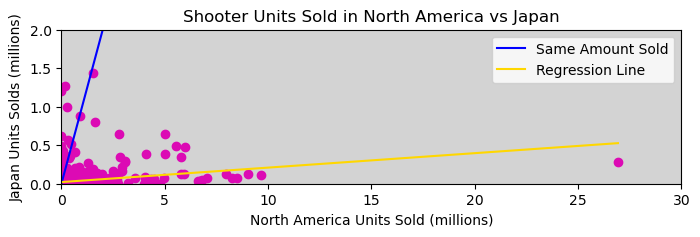

In [24]:
corr = round(st.pearsonr(shooter["NA_Sales"], shooter["JP_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = shooter["NA_Sales"]
y_values = shooter["JP_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(8, 2),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c="#dc0ab4")

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,30])
plt.ylim([0,2])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper right")

plt.title("Shooter Units Sold in North America vs Japan")
plt.xlabel("North America Units Sold (millions)")
plt.ylabel("Japan Units Solds (millions)")
plt.show()

In [25]:
shooter_out = shooter.loc[shooter["JP_Sales"]>.75]
shooter_out

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
235,Splatoon,WiiU,2015,Shooter,Nintendo,1.55,1.15,1.44,0.43,4.57,Nintendo
438,Resident Evil 6,PS3,2012,Shooter,Capcom,0.88,0.97,0.88,0.42,3.15,Sony
472,Star Fox,SNES,1993,Shooter,Nintendo,1.61,0.51,0.80,0.07,2.99,Nintendo
1234,Xevious,NES,1984,Shooter,Namco Bandai Games,0.18,0.06,1.27,0.01,1.52,Nintendo
1427,Gradius,NES,1986,Shooter,Konami Digital Entertainment,0.27,0.08,1.00,0.01,1.36,Nintendo
1675,TwinBee,NES,1986,Shooter,Konami Digital Entertainment,0.00,0.00,1.20,0.00,1.20,Nintendo


In [26]:
shooter_out = shooter.loc[shooter["NA_Sales"]>4.75]
shooter_out

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Nintendo
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,Microsoft
31,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,Microsoft
33,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,Sony
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,Sony
35,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73,Microsoft
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.51,Microsoft
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46,Sony
40,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,Sony
43,Halo 3,X360,2007,Shooter,Microsoft Game Studios,7.97,2.83,0.13,1.21,12.14,Microsoft


In [27]:
x1 = shooter["NA_Sales"]
y1 = shooter["JP_Sales"]
X = sm.add_constant(x1)
model = sm.OLS(y1, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               JP_Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     63.55
Date:                Tue, 16 May 2023   Prob (F-statistic):           3.51e-15
Time:                        21:09:30   Log-Likelihood:                 1081.5
No. Observations:                1250   AIC:                            -2159.
Df Residuals:                    1248   BIC:                            -2149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0215      0.003      7.002      0.0

The correlation is 0.54.


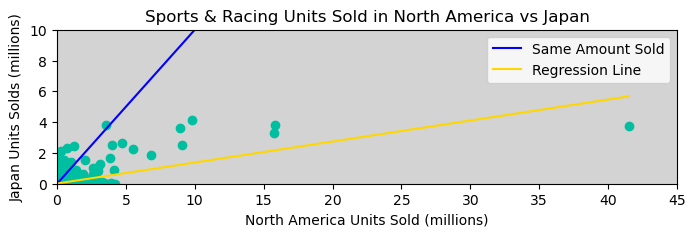

In [28]:
corr = round(st.pearsonr(sports["NA_Sales"], sports["JP_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = sports["NA_Sales"]
y_values = sports["JP_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(8, 2),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c="#00bfa0")

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,45])
plt.ylim([0,10])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper right")

plt.title("Sports & Racing Units Sold in North America vs Japan")
plt.xlabel("North America Units Sold (millions)")
plt.ylabel("Japan Units Solds (millions)")
plt.show()

In [29]:
sports_out = sports.loc[(sports["JP_Sales"]>1) & (sports["NA_Sales"]>3)]
sports_out

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
0,Wii Sports,Wii,2006,Sports & Racing,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,Wii Sports Resort,Wii,2009,Sports & Racing,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
11,Mario Kart DS,DS,2005,Sports & Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,Nintendo
13,Wii Fit,Wii,2007,Sports & Racing,Nintendo,8.94,8.03,3.60,2.15,22.72,Nintendo
14,Wii Fit Plus,Wii,2009,Sports & Racing,Nintendo,9.09,8.59,2.53,1.79,22.00,Nintendo
28,Gran Turismo 3: A-Spec,PS2,2001,Sports & Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,Sony
42,Mario Kart 7,3DS,2011,Sports & Racing,Nintendo,4.74,3.91,2.67,0.89,12.21,Nintendo
47,Gran Turismo 4,PS2,2004,Sports & Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66,Sony
52,Gran Turismo,PS,1997,Sports & Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95,Sony


In [30]:
x1 = sports["NA_Sales"]
y1 = sports["JP_Sales"]
X = sm.add_constant(x1)
model = sm.OLS(y1, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               JP_Sales   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     1414.
Date:                Tue, 16 May 2023   Prob (F-statistic):          6.34e-260
Time:                        21:09:30   Log-Likelihood:                 572.37
No. Observations:                3472   AIC:                            -1141.
Df Residuals:                    3470   BIC:                            -1128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0148      0.004      4.049      0.0

The correlation is 0.77.


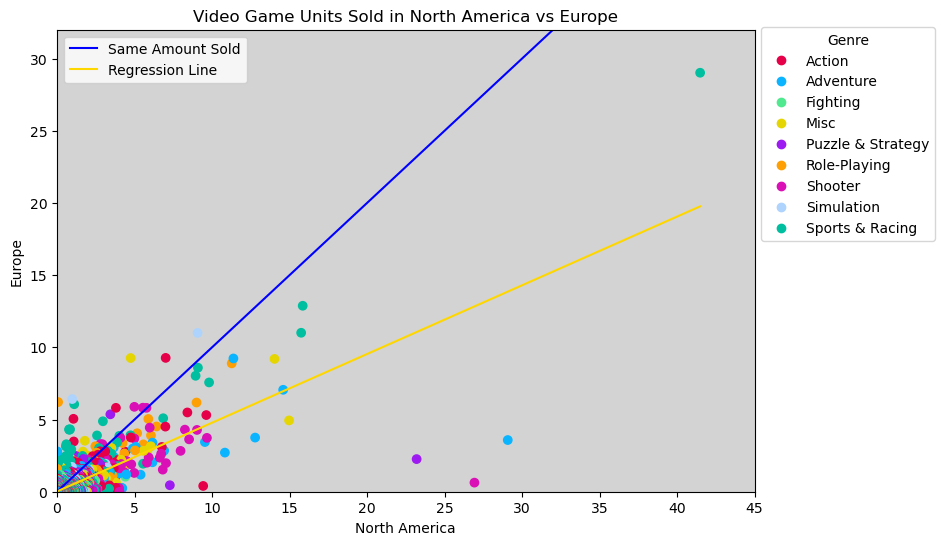

In [31]:
corr = round(st.pearsonr(sales_data_clean["NA_Sales"], sales_data_clean["EU_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs EU
x_values = sales_data_clean["NA_Sales"]
y_values = sales_data_clean["EU_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"


fig, ax = plt.subplots(figsize=(9, 6),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,45])
plt.ylim([0,32])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre", bbox_to_anchor=(1, 1.02))
ax.add_artist(leg1)

plt.title("Video Game Units Sold in North America vs Europe")
plt.xlabel("North America")
plt.ylabel("Europe")
plt.show()

The correlation is 0.87.


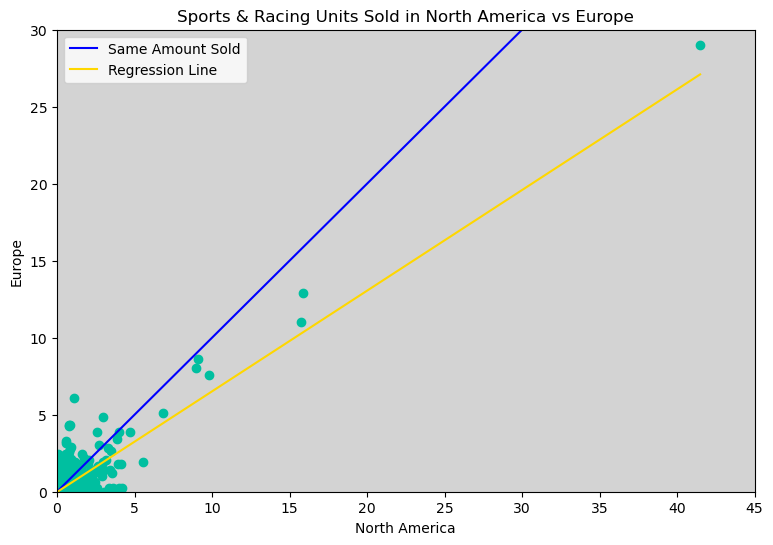

In [32]:
corr = round(st.pearsonr(sports["NA_Sales"], sports["EU_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = sports["NA_Sales"]
y_values = sports["EU_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(9, 6),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c="#00bfa0")

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,45])
plt.ylim([0,30])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")

plt.title("Sports & Racing Units Sold in North America vs Europe")
plt.xlabel("North America")
plt.ylabel("Europe")
plt.show()

In [33]:
sports_out = sports.loc[(sports["EU_Sales"]>5) & (sports["NA_Sales"]>5)]
sports_out

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
0,Wii Sports,Wii,2006,Sports & Racing,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,Wii Sports Resort,Wii,2009,Sports & Racing,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
11,Mario Kart DS,DS,2005,Sports & Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,Nintendo
13,Wii Fit,Wii,2007,Sports & Racing,Nintendo,8.94,8.03,3.60,2.15,22.72,Nintendo
14,Wii Fit Plus,Wii,2009,Sports & Racing,Nintendo,9.09,8.59,2.53,1.79,22.00,Nintendo
28,Gran Turismo 3: A-Spec,PS2,2001,Sports & Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,Sony


In [34]:
x1 = shooter["NA_Sales"]
y1 = shooter["EU_Sales"]
X = sm.add_constant(x1)
model = sm.OLS(y1, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               EU_Sales   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     1042.
Date:                Tue, 16 May 2023   Prob (F-statistic):          1.19e-166
Time:                        21:09:31   Log-Likelihood:                -660.66
No. Observations:                1250   AIC:                             1325.
Df Residuals:                    1248   BIC:                             1336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1031      0.012      8.323      0.0

The correlation is 0.67.


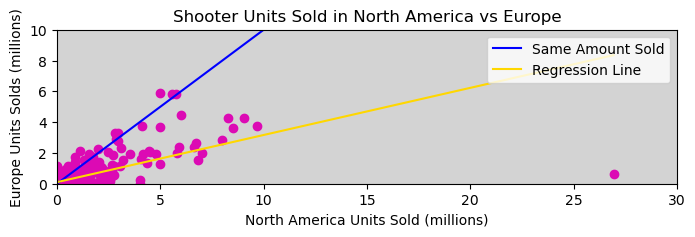

In [35]:
corr = round(st.pearsonr(shooter["NA_Sales"], shooter["EU_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = shooter["NA_Sales"]
y_values = shooter["EU_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(8, 2),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c="#dc0ab4")

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,30])
plt.ylim([0,10])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper right")

plt.title("Shooter Units Sold in North America vs Europe")
plt.xlabel("North America Units Sold (millions)")
plt.ylabel("Europe Units Solds (millions)")
plt.show()

In [36]:
shooter_out = shooter.loc[(shooter["NA_Sales"]>4) & (shooter["EU_Sales"]>4)]
shooter_out

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,Microsoft
33,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,Sony
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,Sony
35,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73,Microsoft
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46,Sony
40,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,Sony


The correlation is 0.88.


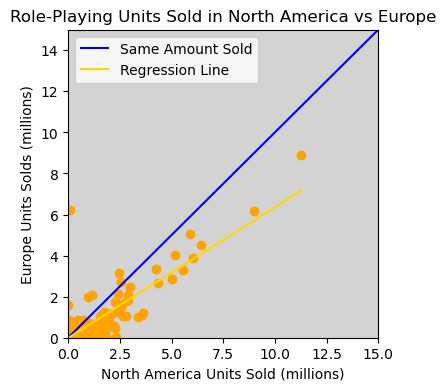

In [37]:
corr = round(st.pearsonr(rpg["NA_Sales"], rpg["EU_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = rpg["NA_Sales"]
y_values = rpg["EU_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(4, 4),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c="#ffa300")

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,15])
plt.ylim([0,15])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")

plt.title("Role-Playing Units Sold in North America vs Europe")
plt.xlabel("North America Units Sold (millions)")
plt.ylabel("Europe Units Solds (millions)")

plt.show()

In [38]:
rpg_out = rpg.loc[(rpg["NA_Sales"]>4) & (rpg["EU_Sales"]>4)]
rpg_out

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,Nintendo
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,Nintendo
30,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64,Nintendo
32,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,Nintendo


The correlation between North American Sales and Global Sales is 0.94.


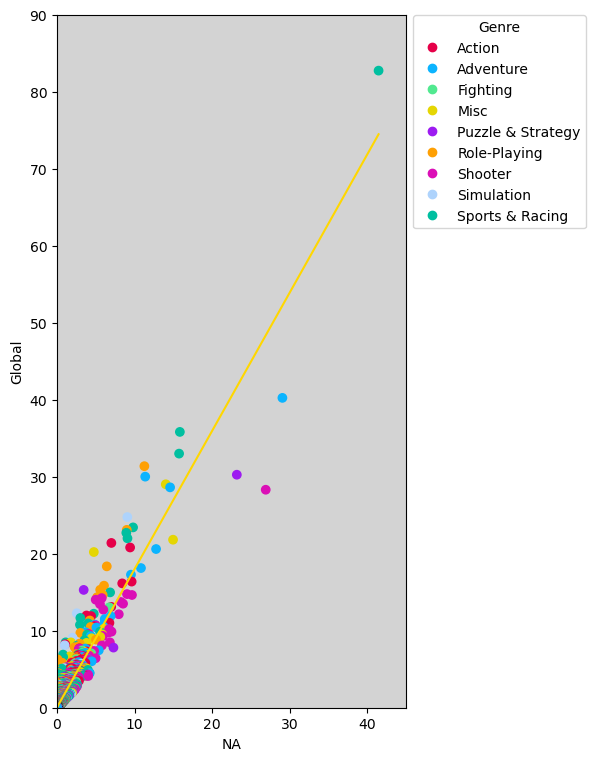

In [39]:
corr = round(st.pearsonr(sales_data_clean["NA_Sales"], sales_data_clean["Global_Sales"])[0],2)
print(f"The correlation between North American Sales and Global Sales is {corr}.")

#NA vs Global
x_values = sales_data_clean["NA_Sales"]
y_values = sales_data_clean["Global_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(4.5, 9),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)


plt.xlim([0,45])
plt.ylim([0,90])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre",bbox_to_anchor=(1, 1.01))


plt.xlabel("NA")
plt.ylabel("Global")
plt.show()

In [40]:
x1 = rpg["NA_Sales"]
y1 = rpg["EU_Sales"]
X = sm.add_constant(x1)
model = sm.OLS(y1, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               EU_Sales   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     4690.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        21:09:32   Log-Likelihood:                 8.3539
No. Observations:                1429   AIC:                            -12.71
Df Residuals:                    1427   BIC:                            -2.178
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0145      0.007     -2.162      0.0

The correlation is 0.61.


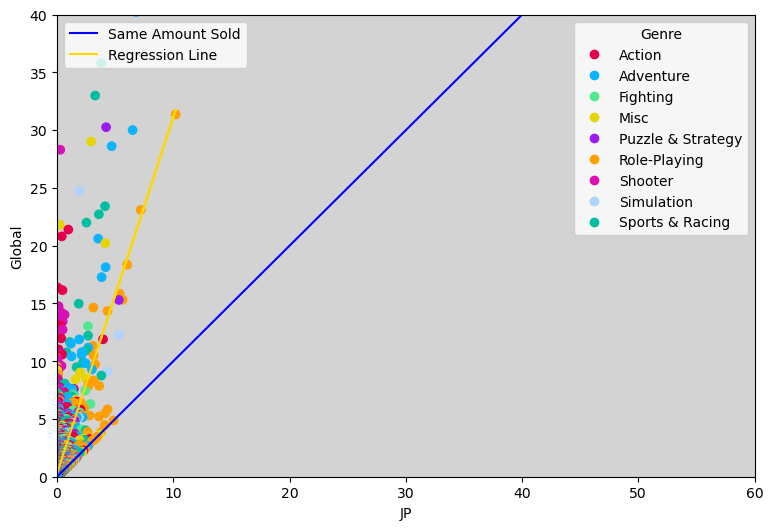

In [41]:
corr = round(st.pearsonr(sales_data_clean["JP_Sales"], sales_data_clean["Global_Sales"])[0],2)
print(f"The correlation is {corr}.")

#JP vs Global

x_values = sales_data_clean["JP_Sales"]
y_values = sales_data_clean["Global_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

fig, ax = plt.subplots(figsize=(9, 6),facecolor="#FFFFFF")
ax.set_facecolor("lightgrey")
scatter = ax.scatter(x_values, y_values, c = sales_data_clean.Genre.astype('category').cat.codes, cmap=full_genre)

x = np.linspace(0,100,100)
y = x
line1, = ax.plot(x,y, color="blue")

plt.xlim([0,60])
plt.ylim([0,40])
line2, = ax.plot(x_values,regress_values, "gold")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
leg1 = ax.legend(handles=[line1, line2],labels=["Same Amount Sold","Regression Line"], loc="upper left")
leg2 = ax.legend(handles=scatter.legend_elements()[0], labels = genre_name, title="Genre")
ax.add_artist(leg1)

plt.xlabel("JP")
plt.ylabel("Global")
plt.show()

In [42]:
world = sales_data_clean.groupby("Year")["Global_Sales"].sum()
NA = sales_data_clean.groupby("Year")["NA_Sales"].sum()
JP = sales_data_clean.groupby("Year")["JP_Sales"].sum()
EU = sales_data_clean.groupby("Year")["EU_Sales"].sum()
other = sales_data_clean.groupby("Year")["Other_Sales"].sum()

df2 = pd.DataFrame(
    {
        "Global" : world,
        "NA" : NA,
        "JP" : JP,
        "EU" : EU,
        "Other" : other
    }
)

df2

,Global,NA,JP,EU,Other
Year,,,,,
1980,11.38,10.59,0.00,0.67,0.12
1981,35.77,33.40,0.00,1.96,0.32
1982,28.86,26.92,0.00,1.65,0.31
1983,16.79,7.76,8.10,0.80,0.14
1984,50.36,33.28,14.27,2.10,0.70
1985,53.94,33.73,14.56,4.74,0.92
1986,37.07,12.50,19.81,2.84,1.93
1987,21.74,8.46,11.63,1.41,0.20
1988,47.22,23.87,15.76,6.59,0.99


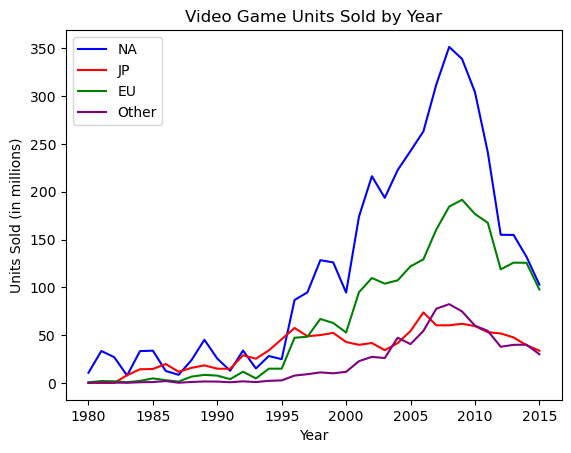

In [43]:
# plt.plot(df2.index, df2["Global"], label = "Global")
plt.plot(df2.index, df2["NA"], label = "NA", color="blue")
plt.plot(df2.index, df2["JP"], label = "JP", color="red")
plt.plot(df2.index, df2["EU"], label = "EU", color="green")
plt.plot(df2.index, df2["Other"], label = "Other", color="purple")

plt.xlabel("Year")
plt.ylabel("Units Sold (in millions)")
plt.legend()
plt.title("Video Game Units Sold by Year")
plt.savefig("VG per year.png", transparent = True)
plt.show()

In [44]:
mix1 = sales_data_clean.loc[sales_data_clean.Genre.isin(["Shooter", "Role-Playing", "Sports & Racing"])]
genre_mix1 = []

for x in mix1["Genre"]:
    
    if x not in genre_mix1:
        genre_mix1.append(x)
genre_mix1.sort()

In [45]:
bins = [1980, 1989, 1999, 2009, 2015]
labels = ["1980s", "1990s", "2000s", "2010s"]

In [46]:
sales_decade = sales_data_clean.copy()

In [47]:
gcolors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]

In [48]:
sales_decade["Decade"] = pd.cut(sales_decade["Year"],bins=bins, labels=labels)
sales_decade

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company,Decade
0,Wii Sports,Wii,2006,Sports & Racing,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,2000s
1,Super Mario Bros.,NES,1985,Adventure,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,1980s
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,2000s
3,Wii Sports Resort,Wii,2009,Sports & Racing,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,2000s
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Adventure,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Sports & Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony,2000s
16596,Know How 2,DS,2010,Puzzle & Strategy,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nintendo,2010s


In [49]:
bins = [1980, 1989, 1999, 2009, 2015]
labels = ["1980s", "1990s", "2000s", "2010s"]

sales_decade = sales_data_clean.copy()

gcolors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]

sales_decade["Decade"] = pd.cut(sales_decade["Year"],bins=bins, labels=labels)
sales_decade

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company,Decade
0,Wii Sports,Wii,2006,Sports & Racing,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,2000s
1,Super Mario Bros.,NES,1985,Adventure,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,1980s
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,2000s
3,Wii Sports Resort,Wii,2009,Sports & Racing,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,2000s
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Adventure,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Sports & Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony,2000s
16596,Know How 2,DS,2010,Puzzle & Strategy,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nintendo,2010s
